In [1]:
# Import Libraries: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import data
df = pd.read_csv('kyphosis.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [5]:
# minimum age
df['Age'].min()

1

In [6]:
#maximum age 
df['Age'].max()

206

In [7]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
# replace absent with 0 and present with 1
df['Kyphosis'] = df['Kyphosis'].replace({'absent': 0, 'present': 1})
df.head(4)

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1


In [9]:
X = df.drop(columns ='Kyphosis')
Y = df['Kyphosis']

In [15]:
corr_matrix = X.corr(method='pearson')
corr_matrix 

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


<Axes: >

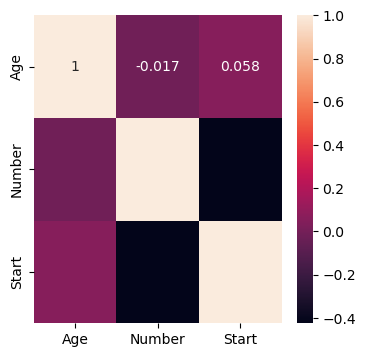

In [12]:
# let us see the correlation between two variables

corr_matrix = X.corr(method='pearson')

plt.figure(figsize=(4,4)) 

sns.heatmap(corr_matrix, annot = True)

/Users/kritikakhanwal/miniconda3/envs/nemo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kritikakhanwal/miniconda3/envs/nemo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kritikakhanwal/miniconda3/envs/nemo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


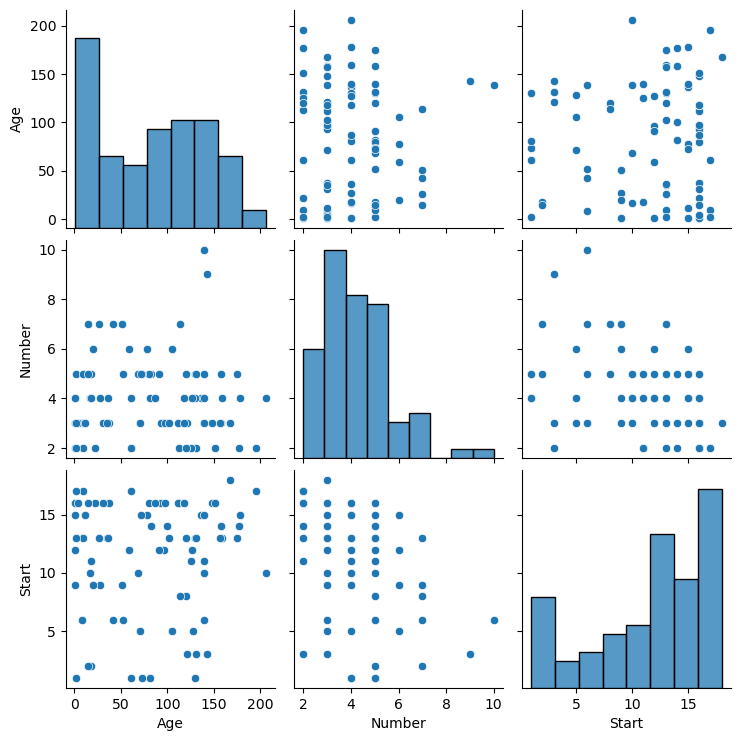

In [13]:
# we can check the pairwise plot between all the x features to see their dependencies: 
sns.pairplot(X)

The data number and starting age seems to be skewed and age data seems to have a peak for initial values. 
Also, there doesnt seem to be any linear correlations visually between parameters, weak + or -ve correlations exists 

<Axes: xlabel='Kyphosis', ylabel='count'>

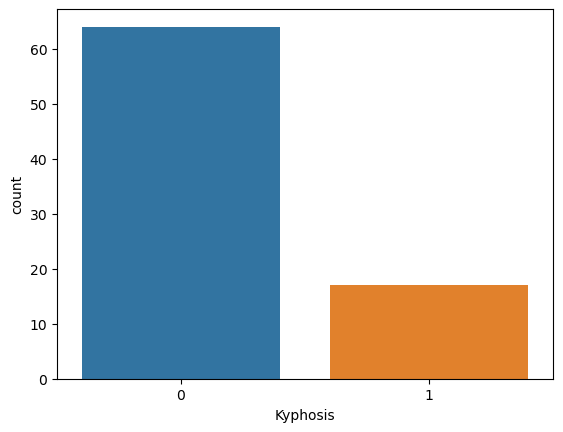

In [16]:
# 0 denotes absent and y denotes present
sns.countplot(df,x = 'Kyphosis')

In [18]:
# divide the data into test and train samples:

X_train,X_test ,Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 3)

In [19]:
X_train.shape
X_test.shape

(17, 3)

In [20]:
# transform the train and test data using StandardScaler which will normalise the training and test data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,Y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# Predicting the Test set results
Y_predict_test = model.predict(X_test)

# check the confusion matrix
cm = confusion_matrix(Y_test,Y_predict_test)
print(cm)

[[11  3]
 [ 2  1]]


It seems that True negative number is 11 out of 17 data point and 1 for true positive

<Axes: >

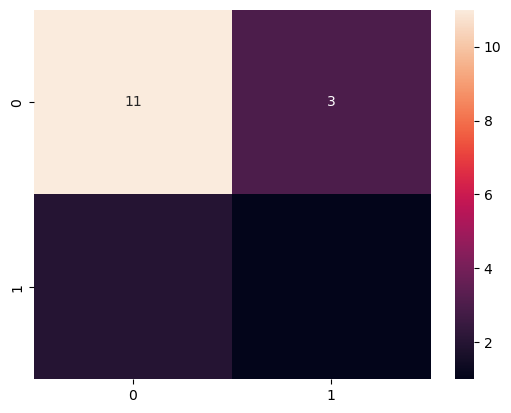

In [28]:
sns.heatmap(cm, annot = True)

In [29]:
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.25      0.33      0.29         3

    accuracy                           0.71        17
   macro avg       0.55      0.56      0.55        17
weighted avg       0.74      0.71      0.72        17

